<h1>This is why Techdays are useful</h1>

<p style='text-align: justify;'> 
Can hosting Tech Days be useful for organisations to assist in the transformation into data-driven entities? We hosted two Tech Days to find out.</p>

<strong>Approach CRISP-DM</strong>
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation/Results
6. Deployment

<h2>1. Business Understanding</h2>
<h3>1.1 Background</h3>
<p style='text-align: justify;'> 
Two case studies on Tech Days were conducted. The first one was a two-day face-to-face event, where a company's IT department together with a supplier hosted an analytics focused event. This was the first time the IT department hosted an event of this nature. The second Tech Day was hosted as a one day virtual event. Both events had a similar objective, firstly to raise awareness of new analytics technologies. Secondly, to give the people in the department the chance to share their experience and knowledge and lastly to facilitate the diffusion of innovation among the attendees.</p>

<p style='text-align: justify;'> 
After both Tech Days, surveys were sent out to the attendees. This was done my making use of <a href="http://www.surveymonkey.com/">SurveyMonkey</a>. The questionnaires were designed in order to allow for a qualitative analysis of the effective of the event, therefore a number of open ended questions were included in the questionnaire.</p>

<h3>1.2 Business Questions</h3>
<p style='text-align: justify;'> <strong>The objective of the analysis is to try and answer the following three questions:</strong></p>
<p>
<strong>Question 1</strong>: Are Tech Days useful to improve adoption of analytics tools?
<br>
<strong>Question 2</strong>: What are some of key elements to hosting a successful Tech Day? 
<br>
<strong>Question 3</strong>: Can we group the participants into groups in order to have a more focused approach in the next Tech Day?
</p>

<h2>2. Data Understanding</h2>
<h3>2.1 Lets start by importing the libraries and the survey result datasets</h3>

In [43]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
# import the data of the two tech days
df_1 = pd.read_excel('https://s3.us-east-2.amazonaws.com/d5mit.co.za/Notebooks_Data/tech_day1.xlsx')  # survey results tech day 1
df_2 = pd.read_excel('https://s3.us-east-2.amazonaws.com/d5mit.co.za/Notebooks_Data/tech_day2.xlsx') # survey results tech day 2
df_c = pd.read_excel('https://s3.us-east-2.amazonaws.com/d5mit.co.za/Notebooks_Data/Codes.xlsx')              # survey results codes
df_1['Event'] = '1'
df_2['Event'] = '2'
df_main = pd.concat([df_1,df_2])

# dictionary with codes
df_c = df_c.set_index('Value')
codes_dict = df_c.to_dict()


<h3>2.2 Initial exploration of the dataset</h3>
<p style='text-align: justify;'> Now that we have the data loaded, let's analyze the results.  First let's look at the questions that were used in the survey dataset. As it can be seen below some question are open-ended and some not.  Secondly, change the column names in the dataframe to shorter names.  The survey feedback is saved in <strong>df_main</strong>.</p>

In [45]:
# get info on if question is open-ended or not
df_colinfo = df_main.iloc[0:1, 1:15].T.sort_values(by=[0])
df_main = df_main.drop(0)

The number of people for which we received feedback:

In [46]:
len(df_main)

163

In [47]:
# rename columns and save into df_main
ishort = ['Respondent ID','Event Rating','Liked','Dislike','Using BIA Tools','Using BIA Tools for',
          'Experience','Attitude', 'Company can improve','Importance of BIA',
          'Value to Company','Content Useful','Preventing use','Event impact on adoption','Event']

df_columns = pd.DataFrame(ishort, index = df_main.columns.tolist())
df_main.columns = ishort

pd.set_option('display.max_colwidth', 200)
html = df_columns.to_html()

In [48]:
# save column data in df_columns
df_columns = df_columns.merge(df_colinfo, left_index=True, right_index=True)
df_columns.columns = ['Short Name','Question Type']
df_columns

,Short Name,Question Type
"Overall, how would you rate the event?",Event Rating,Response
What did you like about the event?,Liked,Open-Ended Response
What did you dislike about the event?,Dislike,Open-Ended Response
Are you using Business Intelligence and Analytics tools in your daily work?,Using BIA Tools,Response
"If you are using Business Intelligence and Analytics tools, for what are you using it?",Using BIA Tools for,Open-Ended Response
How much experience do you have in Business Intelligence and Analytics?,Experience,Response
How would you rate your attitude toward Business Intelligence and Analytics?,Attitude,Response
Is there anything that your company can do to improve your attitude towards Business Intelligence and Analytics?,Company can improve,Open-Ended Response
How important do you think is Business Intelligence and Analytics in running a successful business,Importance of BIA,Response
"If you effectively use Business Intelligence and Analytics tools, how valuable will you be for the company?",Value to Company,Response


Data sample:

In [50]:
# Sample
df_main.sample(n=4)

,Respondent ID,Event Rating,Liked,Dislike,Using BIA Tools,Using BIA Tools for,Experience,Attitude,Company can improve,Importance of BIA,Value to Company,Content Useful,Preventing use,Event impact on adoption,Event
28,28.0,Very good,The Qliksense insight,Some presenters had a flat voice throughout teh presentation which made it a bit difficult to understand their content.,Usually,reporting,Very experienced,Very positive,The training is,Extremely important,Extremely valuable,Very useful,"access, nothing i can not change",Very likely,1
70,170.0,Excellent,Everyone was engaged,"More interactive session for Agile, maybe more conversation style",Always,NaN,Extremely experienced,Very positive,NaN,Extremely important,Very valuable,Very useful,NaN,NaN,2
52,52.0,Fair,It shows what we can do with qlik... One would need to know when do we start using it,"mixture of attendees, i.e. super users and new people. it complicates interaction. Rather filter as per level",Never,NaN,Not at all experienced,Very negative,"yes, right training can help",Very important,Very valuable,Very useful,No.,Likely,1
34,134.0,Very good,they were easy to relate to and therefore you can constantly pay attention and there learning was better,well i would love to see topics around SAP HANA as i am a BW consultant,Always,Qlik Sense WAD and AFO,Somewhat experienced,Very positive,NaN,Extremely important,Extremely valuable,Very useful,NaN,Very likely,2


<h2>3. Data Preparation</h2>
<h3>3.1 Encode the non open ended questions</h3>

In [51]:
# code the data
def code_response_columns(icolumn, df_imain):
    """ 
    Summary line. 

    takes the dataframe and adds a column based on the dictionary mapping

    Parameters: 
    icolumn (string): the column name on which the coding should be done
    df_imain (dataframe): the data frame on which the changes should be done

    Returns: 
    dataframe:  Output a dataframe with one new column that uses the dictionary to as mapping

    """    
    new_icolumn = icolumn + '_c'
    df_imain[new_icolumn] = df_imain[icolumn]
    df_imain[new_icolumn] = df_imain[new_icolumn].map(codes_dict['Code'])    
    return df_imain

# add encoded columns
for col in df_columns['Short Name'][df_columns['Question Type'] == 'Response'].tolist():
    df_main = code_response_columns(col, df_main)

Let's have a look at how complete the dataset is:

In [52]:
df_main.isna().sum().sort_values(ascending=False)

Company can improve           75
Using BIA Tools for           59
Preventing use                57
Dislike                       43
Liked                         27
Value to Company_c             4
Value to Company               4
Content Useful                 2
Event impact on adoption       2
Content Useful_c               2
Importance of BIA_c            2
Attitude_c                     2
Experience_c                   2
Event impact on adoption_c     2
Importance of BIA              2
Attitude                       2
Experience                     2
Event Rating_c                 1
Using BIA Tools_c              1
Event Rating                   1
Using BIA Tools                1
Event                          0
Respondent ID                  0
dtype: int64

Majority of missing data is in the open ended questions. The rest of the missing values are not that significant in number. Drop the NaN values from the dataset.

In [53]:
# Drop the NaNs
df_main = df_main.dropna(subset=['Event Rating',
                                 'Using BIA Tools',
                                 'Experience',
                                 'Value to Company',
                                 'Content Useful',
                                 'Event impact on adoption'])

df_main.isna().sum().sort_values(ascending=False)

Company can improve           70
Preventing use                55
Using BIA Tools for           53
Dislike                       41
Liked                         26
Respondent ID                  0
Event                          0
Content Useful_c               0
Value to Company_c             0
Importance of BIA_c            0
Attitude_c                     0
Experience_c                   0
Using BIA Tools_c              0
Event Rating_c                 0
Content Useful                 0
Event impact on adoption       0
Event Rating                   0
Value to Company               0
Importance of BIA              0
Attitude                       0
Experience                     0
Using BIA Tools                0
Event impact on adoption_c     0
dtype: int64

<br>Lets look at some sample data in the dataset: 

In [54]:
# look at number of entries after cleaning
df_main.shape

(153, 23)

In [55]:
# Sample
df_main.sample(n=3)

,Respondent ID,Event Rating,Liked,Dislike,Using BIA Tools,Using BIA Tools for,Experience,Attitude,Company can improve,Importance of BIA,...,Event impact on adoption,Event,Event Rating_c,Using BIA Tools_c,Experience_c,Attitude_c,Importance of BIA_c,Value to Company_c,Content Useful_c,Event impact on adoption_c
12,12.0,Good,"Better understanding the tools available to assist with analysis from a Finance perspective, enabling quicker reporting & efficiency. This will definitely add value.",Some sessions were bit too long.,Sometimes,Financial Analysis & Reporting,Not so experienced,Very positive,To provide more awareness & understanding/guidance on the tools available.,Extremely important,...,Very likely,1,6.0,6.0,4.0,10.0,10.0,10.0,8.0,10.0
67,67.0,Good,The demonstrations of what you can do with data,it didnt show how the data was sourced,Usually,To get information for customs accounting,Somewhat experienced,Very positive,give IT support,Extremely important,...,Very likely,1,6.0,8.0,6.0,10.0,10.0,10.0,6.0,10.0
9,9.0,Good,"Outline of Qliksense, capabilities and features",Scheduled time. Events should be planned ealier in the day.,Always,Management Reporting,Somewhat experienced,Very positive,NaN,Very important,...,Neither likely nor unlikely,1,6.0,10.0,6.0,10.0,8.0,6.0,6.0,6.0


<h3>3.2 Explore the data</h3>

How do all the data look in one view, note the scales are from 1-5, with 5 the most positive: 

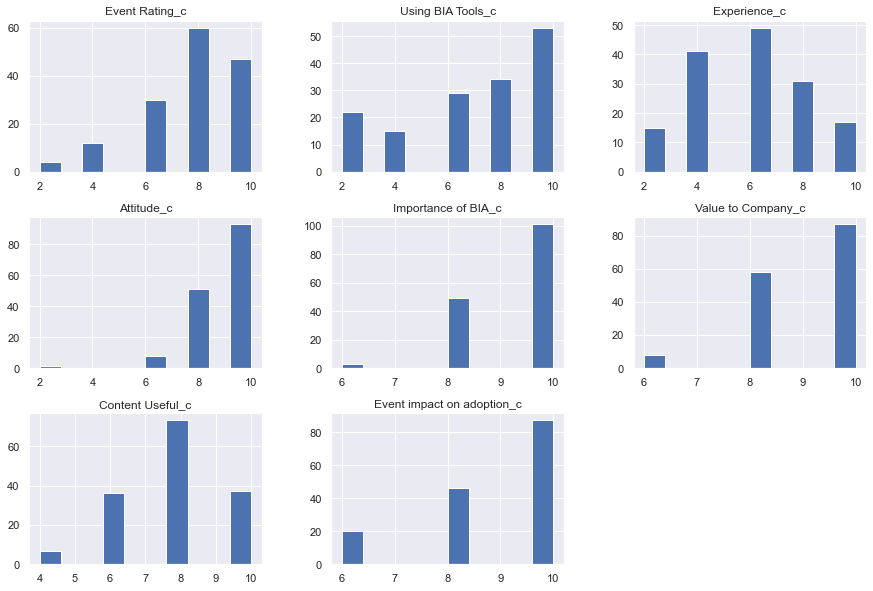

In [56]:
df_corr = df_main.drop(['Respondent ID'], axis=1)
df_corr.hist(figsize=(15, 10));

Create a function to plot the individual question distribution: 

In [57]:
def plot_q_feedback(icolumn, df_main):
    """ 
    plot the data of a spesific dataframe columnn

    prepare the data for plotting and plotting the datya 

    Parameters: 
    icolumn (string): the column that needs to be plotted
    df_main (dataframe): the dataframe that is used

    Returns: 
    a bar plotted

    """    
    # prepare data    
    quest_vals = df_main.groupby(icolumn)['Respondent ID'].nunique() # get unique value
    quest_vals = quest_vals.to_frame()                               # convert to a dataframe
    quest_vals['temp'] = quest_vals.index                            # prepare the table for display
    quest_vals['code'] = quest_vals['temp'].map(codes_dict['Code'])  # prepare the table for display
    quest_vals = quest_vals.sort_values(by=['code'])                 # sort the data for display
        
    # plot the figure
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_axes([0,0,1,1])
    X = quest_vals.iloc[:,1]                       #very good, excelent etc
    Y = quest_vals.iloc[:,0]
    ax.bar(X,Y)
    plt.title(df_columns[df_columns['Short Name'] == icolumn].index.tolist()[0]);
    plt.show();

<h3>3.3 QUESTION 1: Are Tech Days useful to improve adoption of analytics tools?</h3>
<p>Investigate if it can be deducted that hosting of a Tech Day have a positive impact on BIA tools adoption.
<br><br><strong>After the event, are the people more likely to use BIA tools?</strong></p>

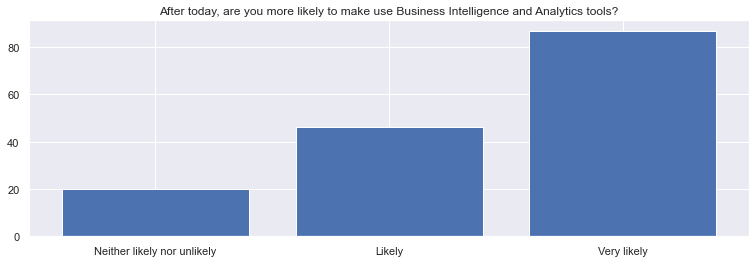

In [58]:
plot_q_feedback('Event impact on adoption', df_main)  

<h3>3.4 QUESTION 2: What are they key elements to hosting a successful Tech Day?</h3>
<p>From the questionnaire feedback, we will try and identify the factors that leads to a successful event also identifify aspects that can be improved.
<br>the first event was face 2 face and the second one was virtual.  <br><br><strong>What was more popular, the virtual event or the face 2 face event?</strong></p>

What was the overall feedback of both events combined? 

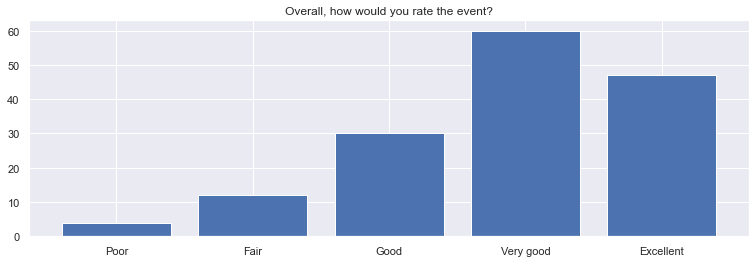

In [59]:
plot_q_feedback('Event Rating', df_main)  

How does that compare to the face 2 face and to the virtual event? 
Let's look at the ratings of the two events? 

<p>From the survey results it is clear that the Tech Day has a positive impact on BIA tool adoption.
<br><br>
<strong>Is there a correlation between the even quality and the adoption?</strong></p>

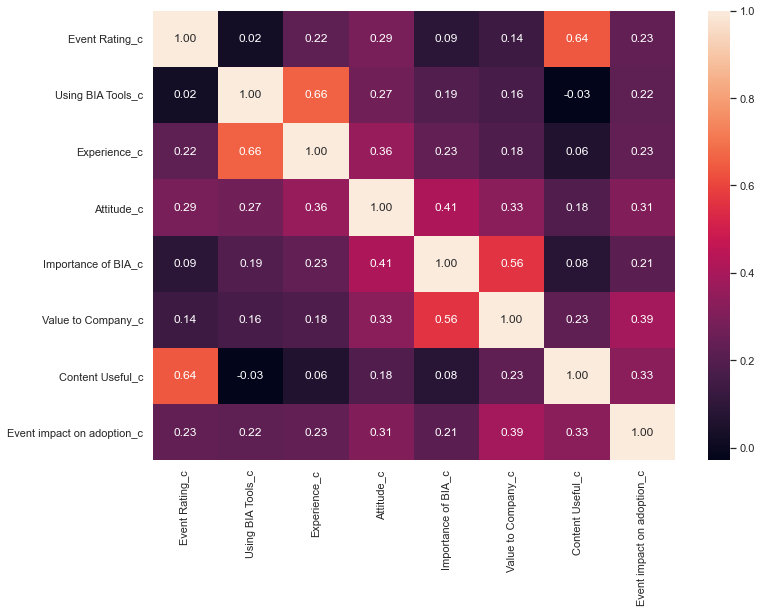

In [60]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f");

<p>From this it seems like that understanding that believing having knowledge on BAI increases your value to an organisation has the highest correlation with adoption. Events that has the goal, should therefore spend time on explaining that the persons value to the organisation will increase as a result of learning and using BIA sills. </p>

In [61]:
df_event_1 = df_main[df_main['Event'] == '1']
df_event_2 = df_main[df_main['Event'] == '2']

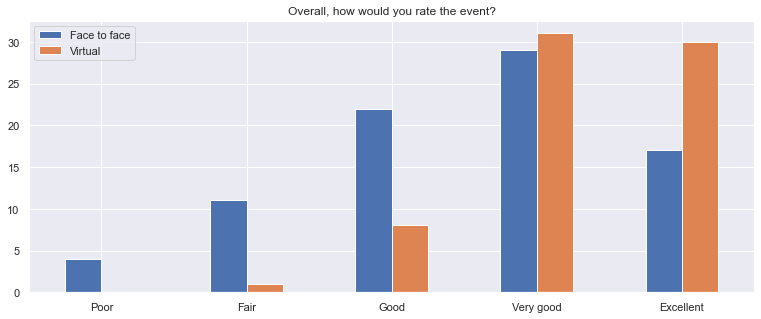

In [62]:
# function to plot dataframe 
def plot_my_df(icolumn, df_input_1, df_input_2, df_1_text, df_2_text):
    """ 
    plot the data of one column (smae name) in two diffferent dataframes. 

    prepare the data for plotting and plotting the data 

    Parameters: 
    icolumn (string): the column that needs to be plotted
    df_input_1 (dataframe): dataframe 1 
    df_1_text (string): description of first dataframe
    df_2_text (string): description of second dataframe   

    Returns: 
    a bar diagram ploting two datasets that has the smae column name

    """   
   
    # prepare data  
    quest_vals = df_input_1.groupby(icolumn)['Respondent ID'].nunique() # get unique value
    quest_vals = quest_vals.to_frame()                               # convert to a dataframe
    quest_vals['temp'] = quest_vals.index                            # prepare the table for display
    quest_vals['code'] = quest_vals['temp'].map(codes_dict['Code'])  # prepare the table for display
    quest_vals = quest_vals.sort_values(by=['code'])                 # sort the data for display

    quest_vals_1 = quest_vals

    if df_event_2.shape[0] > 0:
         # prepare data    
        quest_vals = df_input_2.groupby(icolumn)['Respondent ID'].nunique() # get unique value
        quest_vals = quest_vals.to_frame()                               # convert to a dataframe
        quest_vals['temp'] = quest_vals.index                            # prepare the table for display
        quest_vals['code'] = quest_vals['temp'].map(codes_dict['Code'])  # prepare the table for display
        quest_vals = quest_vals.sort_values(by=['code'])                 # sort the data for display

        quest_vals_2 = quest_vals

    # combine
    df_merge_col = pd.merge(quest_vals_1, quest_vals_2, on=icolumn, how='outer') 

    # plot the data
    ititle = df_columns[df_columns['Short Name'] == icolumn].index.tolist()[0] 
    index = df_merge_col.index.to_list()
    df = pd.DataFrame({df_1_text: df_merge_col.iloc[:,0].to_list(),
                       df_2_text: df_merge_col.iloc[:,3].to_list()}, index=index)
    ax = df.plot.bar(rot=0, title=ititle, figsize=(13,5))

# plot the two events
plot_my_df('Event Rating', df_event_1, df_event_2, 'Face to face', 'Virtual')  

Both events were relatively well received, however it seems the event 2, which was the virtual event, had better ratings. 

<strong>What did the people like about the event?</strong>

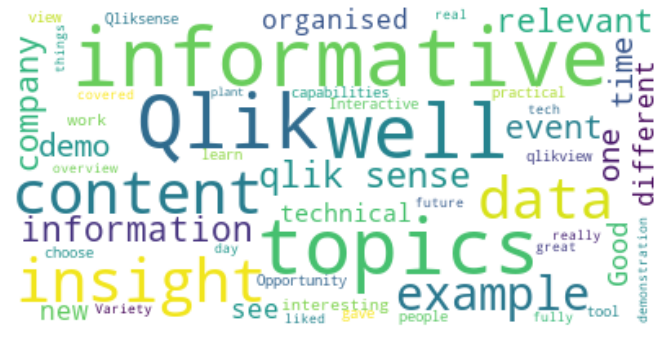

In [63]:
# function to create word cloud 
def create_wordcloud(df_cloud, i_column):
    """ 
    creates a wordcload based on a dataframe column as input. 

    Parameters: 
    df_main (data frame): dataframe containing data
    i_column (string): Column 

    Returns: 
    int: wordcloud

    """
    
    
# get the text of what BIA tools are used
    df_text = df_cloud.dropna(subset=[i_column]) 
    df_text = df_text[i_column]

    # take dataframe and put in text
    text = " ".join(itext for itext in df_text)

    stopwords = set(STOPWORDS)
    stopwords.update(["session", "sessions", "presentation", "lot", "flavors"])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
create_wordcloud(df_main, 'Liked')    

<strong>What did the people dislike about the event?</strong>

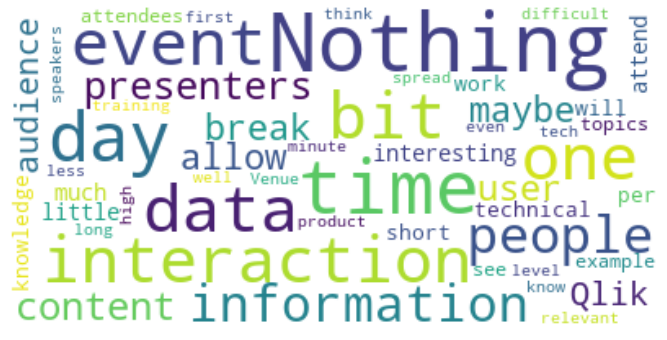

In [64]:
create_wordcloud(df_main, 'Dislike')    

<h3>3.4 QUESTION 3: Can we group the participants into 3 groups in order to have a more focused approach in the next Tech Day?</h3>
<p style='text-align: justify;'> Are the people that joined the Tech Days experienced, are they already using analytical tools and what is their attitude toward Business Intelligence and Analytics?</p>

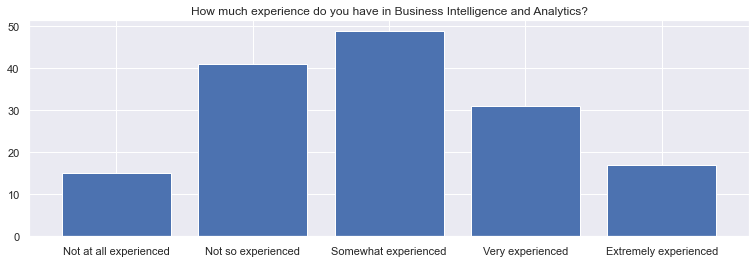

In [65]:
plot_q_feedback('Experience', df_main)  

From this, it seems like the participants of the Tech Days experience level resembles a bell shape curve.

Are the participants currently using Business Intelligence and Analytics (BIA) tools?  

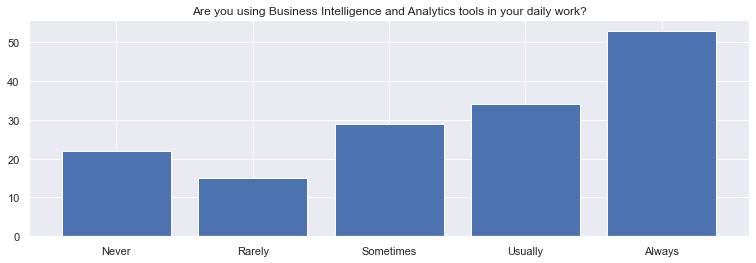

In [66]:
plot_q_feedback('Using BIA Tools', df_main)  

The people that are using BIA tools, what are they using it for? 

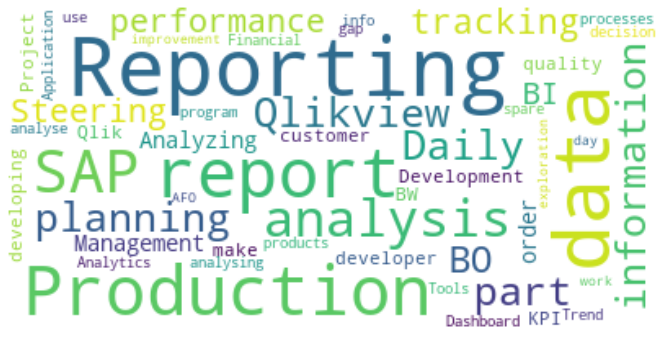

In [67]:
# get the text of what BIA tools are used
create_wordcloud(df_main, 'Using BIA Tools for')

This exploration gave some valuable insights into the participants, however let's see if we can use some unsupervised learning to group the people into 3 target groups.  

<h2>4. Model the data</h2>

In [68]:
# get only the 
df_for_kmeans = df_main.iloc[:, 15:]
# df_for_kmeans = df_main[['Using BIA Tools_c', 'Experience_c', 'Attitude_c', 'Importance of BIA_c', 'Value to Company_c']]

df_for_kmeans.head()

,Event Rating_c,Using BIA Tools_c,Experience_c,Attitude_c,Importance of BIA_c,Value to Company_c,Content Useful_c,Event impact on adoption_c
1,8.0,8.0,8.0,10.0,10.0,10.0,8.0,10.0
2,4.0,6.0,2.0,10.0,10.0,10.0,6.0,8.0
3,8.0,6.0,4.0,10.0,10.0,10.0,8.0,10.0
4,4.0,10.0,6.0,10.0,10.0,10.0,6.0,10.0
5,6.0,10.0,6.0,8.0,10.0,10.0,8.0,10.0


In [69]:
#do impute: clean NaNs
# from sklearn.impute import SimpleImputer 
# imp = SimpleImputer(strategy='mean')
# customers_clean_imp = imp.fit_transform(customers_clean)

# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_for_kmeans_scaled = scaler.fit_transform(df_for_kmeans)

In [70]:
# Fit on X for 12 components
# pca = PCA(n_components=7)
# X_pca = pca.fit_transform(df_for_pca_scaled)
# df_cust_pca = pd.DataFrame(X_pca, columns=np.arange(1, 8))

#-do clustering for customers into 7 clusters 
kmeans_k = KMeans(2)
    
# predictions_customers = kmeans_k.fit_predict(df_cust_pca)
predictions_respondents = kmeans_k.fit_predict(df_for_kmeans_scaled)

print(predictions_respondents)

print(type(predictions_respondents))



[0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 1]
<class 'numpy.ndarray'>


In [71]:
df_main.head()

df_main['cluster']=pd.Series(predictions_respondents)

In [72]:
df_main.sample(3)

,Respondent ID,Event Rating,Liked,Dislike,Using BIA Tools,Using BIA Tools for,Experience,Attitude,Company can improve,Importance of BIA,...,Event,Event Rating_c,Using BIA Tools_c,Experience_c,Attitude_c,Importance of BIA_c,Value to Company_c,Content Useful_c,Event impact on adoption_c,cluster
59,59.0,Good,The presentation of the qlik sense and qlikview,NaN,Usually,To analyse data,Somewhat experienced,Positive,Get more training on the technology,Extremely important,...,1,6.0,8.0,6.0,8.0,10.0,10.0,8.0,10.0,0
21,21.0,Very good,"Different levels of user together, practical examples","Examples come already done, maybe if they can be developed on site?",Sometimes,Dashboard Reporting,Not so experienced,Positive,"Further training and receptiveness to proposals (tools, new ideas).",Very important,...,1,8.0,6.0,4.0,8.0,8.0,10.0,8.0,10.0,0
15,115.0,Excellent,The content was relevant and the event was well organised espcially seeing that it was done remotely,"Maybe have the Indaba over more than one day, in order to attend more of the sessions.",Usually,It is part of my work to support these tools,Very experienced,Very positive,NaN,Very important,...,2,10.0,8.0,8.0,10.0,8.0,8.0,8.0,10.0,0


Now that we have clustered the participants into two clusters, lets look at the two clusters and see if we can make sense of the two groups.

In [73]:
# Set average feedback rating per cluster 
df_groups = df_main.groupby('cluster').mean()
df_groups = df_groups.drop(['Respondent ID'], axis=1)

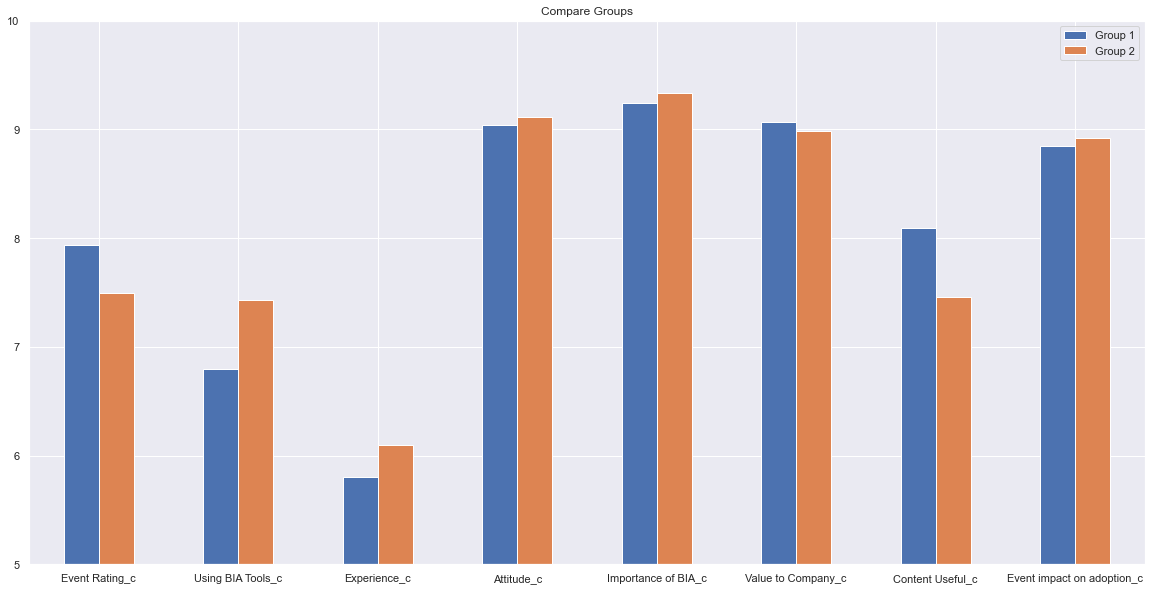

In [74]:
def plot_cluster(df_groups):
    """ 
    Plot two different groups
    
    Parameters: 
    df_groups (dataframe): dataframe with data

    Returns: 
    int: plotted bar chart

    """
    
    # perpare the chart
    list1 = df_groups.iloc[0:1, :].values[0].tolist()
    list2 = df_groups.iloc[1:2, :].values[0].tolist()

    df_groups.columns.to_list()

    # plot the data
    ititle = 'Compare Groups' 
    index = df_groups.columns.to_list()
    df = pd.DataFrame({'Group 1': list1,
                       'Group 2': list2}, index=index)
    # ax = df.plot.bar(rot=0, title=ititle, set_ylim=(2, 5))
    ax = df.plot.bar(rot=0, title=ititle, ylim=(5, 10), figsize=(20,10))
    
plot_cluster(df_groups)

Suppose we look at the average feedback per question. It seems like the difference in the two groups are the greatest in terms of experience and the use of BIA tools. The experience and the use of BIA for Group 1 is lower than for Group 2. Group 2 is the more experienced people. 
<br><br>By comparing whether the average feedback of Group 1 and 2 on whether the content was useful, Group 1 (less experienced) found the content much more useful than Group 2 (more experienced). Group 1 also had a higher average rating of the events compared to Group 2.
<br><br>However, the rate of adoption is very similar between the two groups.

<h2>5. Results</h2>
<h3>Background</h3>

Two Tech Days were hosted. The objective of the Tech Days was to encourage the use of Business Intelligence and analytics tools. After the Tech Days questionnaires were sent out in order to obtain feedback. 
<br><br>
The number of completed questionnaires that were analysed was: 

In [75]:
len(df_main)

153

<h3>5.1 Question 1: Are Tech Days useful to improve adoption of analytics tools?</h3>

From the general feedback, most people found the events very useful:

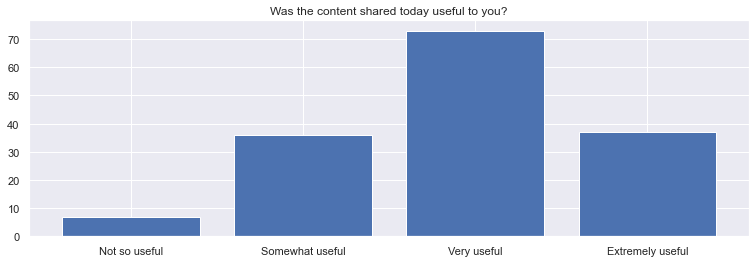

In [76]:
plot_q_feedback('Content Useful', df_main) 

Hosting Tech Days seems to be a useful method in order to improve the likelihood to the adoption of Business Intelligence and Analytics tools.  This is clear as most people gave the feedback that they are more likely to make use of Business Intelligence and analytics tools after the events:

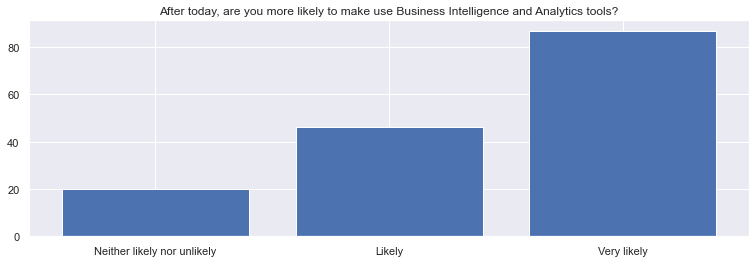

In [77]:
plot_q_feedback('Event impact on adoption', df_main) 

It must be noted, that both events were very well received, with most people rating the events as "good", "very good" or "excellent".  The high level likelihood of adoption as seen after these two events, might not be seen in other case studies where the Tech Day was not that popular. 

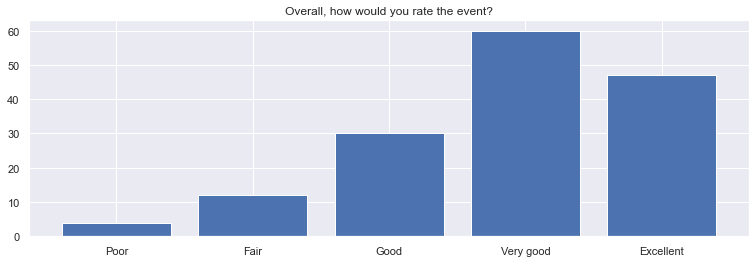

In [78]:
plot_q_feedback('Event Rating', df_main) 

<strong>Summary</strong><br>
- The participants of the two Tech Days gave the feedback that the content presented was useful.
- Hosting Tech Days seems to be a useful method in order to improve the likelihood to the adoption of Business Intelligence and Analytics tools. 
- The rating on both events were very high. It must be noted that the adoption rate after a Tech Day, might not be as good if the event had not a high rating. 

It is therefore worth it to look at what are some key elements to hosting a successful Tech Day.

<h3>5.2 Question 2: What are some of key elements to hosting a successful Tech Day?</h3>

From the survey results and the correlation grid it seems like that understanding that believing having knowledge on Business Intelligence and Analytics tools increases your value to an organisation has the highest correlation with adoption (0.39).  Events that have the goal of encourage the adoption of new Business and Intelligence technologies, should therefore spend time on explaining and communicating to the participants that the person's value to the organisation will increase as a result of up-skilling.

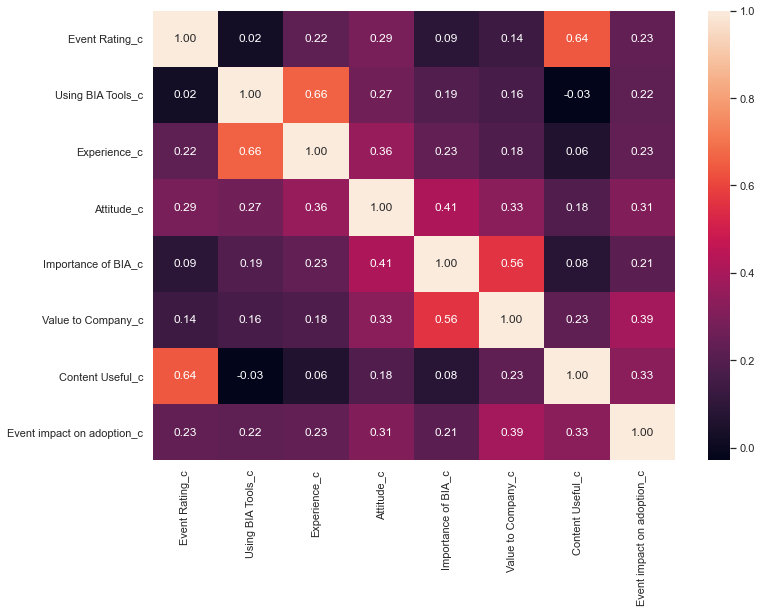

In [79]:
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f");

Both the face to face event and the virtual event had similar ratings.  It must therefore be noted, that virtual events can be just as valuable as face to face Tech Days. The open question is, is this because the expectation perhaps is lower?  However, the objective is no encourage the use of Business Intelligence and Analytics tools. 

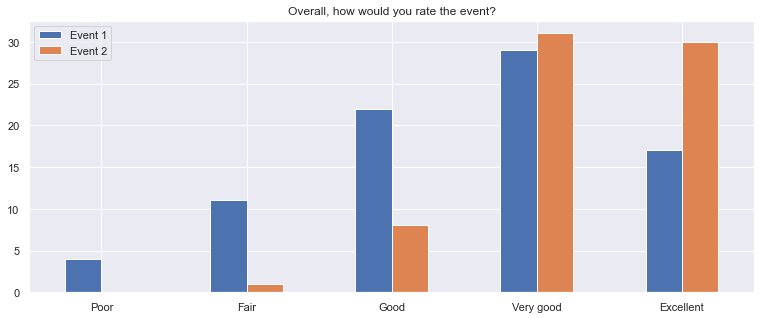

In [80]:
plot_my_df('Event Rating', df_event_1, df_event_2, 'Event 1', 'Event 2')

It seems however that the likelihood of adoption is a little higher for face 2 face events compared to virtual:

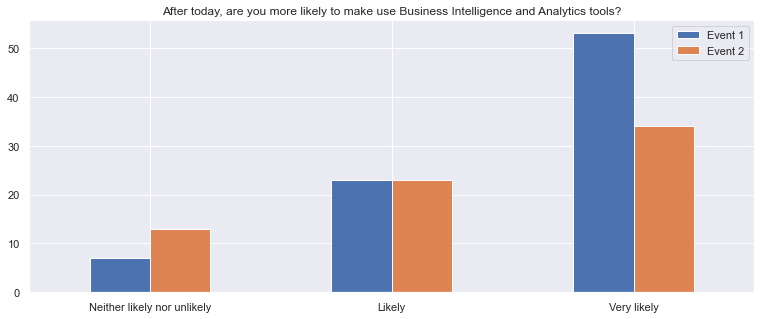

In [81]:
plot_my_df('Event impact on adoption', df_event_1, df_event_2, 'Event 1', 'Event 2')

It seems like people liked informative, insightful and relevant topics.  The topics should be presented in an interactive way using real life practical examples.

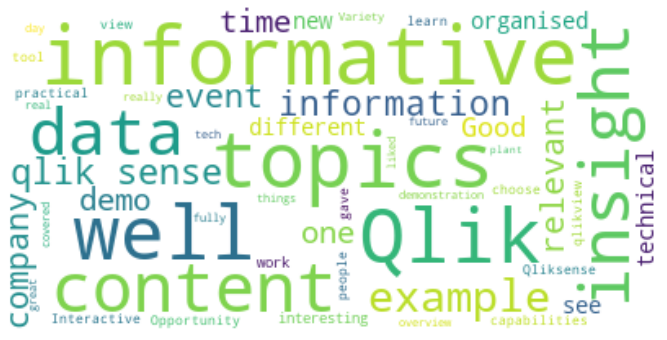

In [82]:
create_wordcloud(df_main, 'Liked')    

Some of the words used when explaining what people disliked are "breaks", "venue" and "Time". Planning for a Tech Day should therefore ensure proper time management, ensure enough breaks and make use of a proper venue.

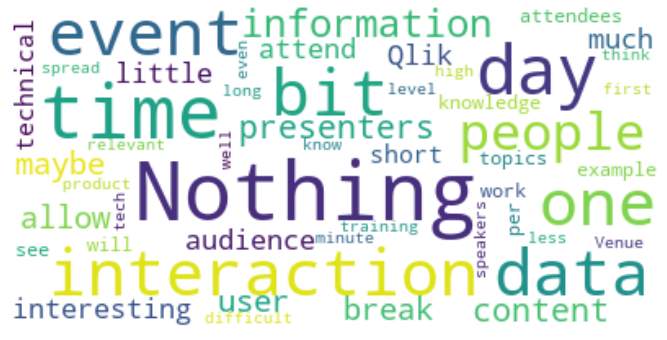

In [83]:
create_wordcloud(df_main, 'Dislike')    

<strong>Summary</strong>
- In order to increase the chances of adoption, ensure that the participants of the Tech Day, understand that if they up-skill and adopt the technologies which is presented during the Tech Day covers, will increase they value to the company they work for. 
- Both face to face and virtual events can be useful.  There is no need to limit you options only to face to face.
- Tech Days topics should be informative, insightful and relevant.  Where possible the topics should be presented in an interactive way using real life practical examples.
- Tech Days should follow a proper agenda with enough breaks and hosted at a appropriate proper venue.

<h3>5.3 Question 3: Can we group the participants into groups in order to have a more focused approach in the next Tech Day?</h3>

Two main groups were identified, the experienced and not so experienced participants.  The experienced people found the topics covered less interesting than what the less experienced people found it. 

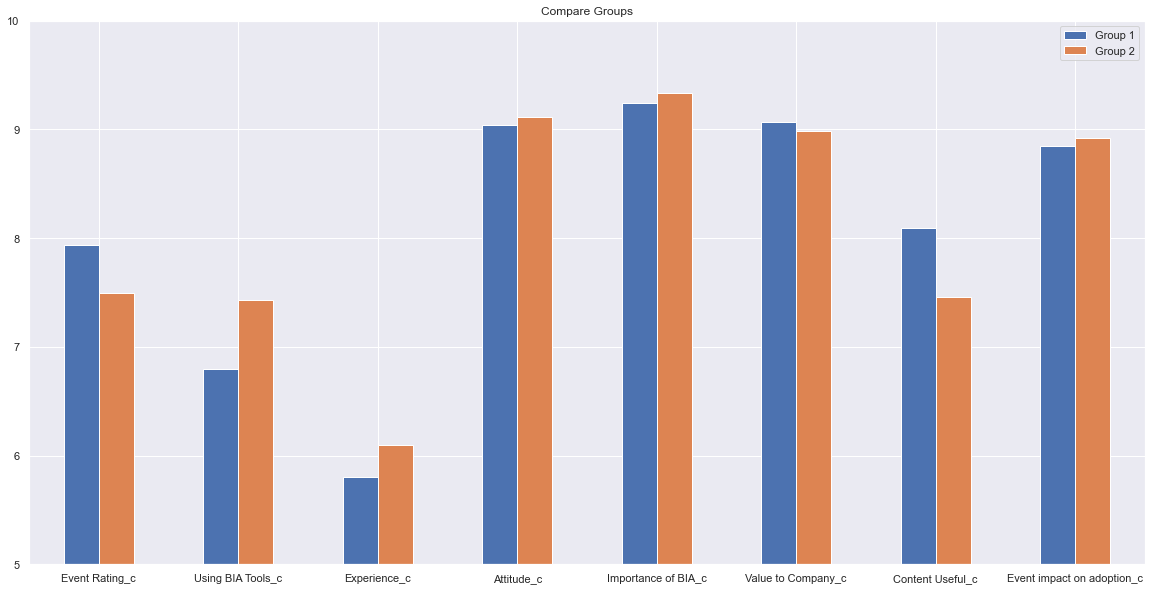

In [84]:
plot_cluster(df_groups)

The people that attended these Tech Days had different levels of experience.   

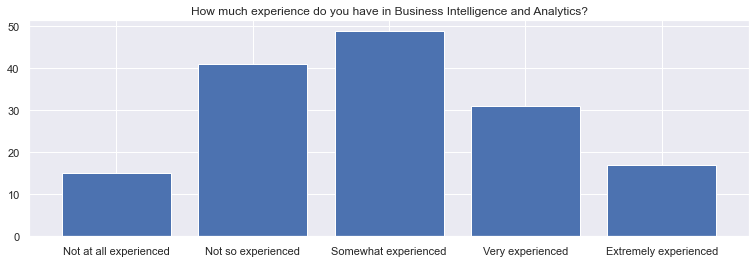

In [85]:
plot_q_feedback('Experience', df_main)  

<strong>Summary</strong>
- Understand the target audience. It might be that different sessions are required by experienced and less experienced participants. 
- Ensure the content presented in the sessions are engaging enough for the target audience. 
- When hosting a Tech Day, the target audience of the session should he made clear. 

<h2>6. Deployment</h2>

The results are summarised in this post:<br> https://medium.com/@dsmit2/this-is-why-tech-days-are-useful-e36597de3730?sk=892f51070bfa7ed7c9969e2cd79b370c